In [1]:
# import pickle
# with open('model.pkl', 'rb') as f:
#     knn = pickle.load(f)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re, string, unicodedata
import nltk
# import contractions
# import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
# from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import string

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import sklearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from ipynb.fs.full.functions_r_j import *

data=pd.read_csv('Resume_Final_Dataset.csv',encoding='ISO-8859–1')
# # data1=pd.read_csv('Resume.csv',encoding='ISO-8859–1')
data.head(2)

,Category,Resume
0,ACCOUNTANT,ACCOUNTANT Professional Summary Curr...
1,ACCOUNTANT,ACCOUNTANT Summary Innovative and ener...


In [3]:
print(data['Category'].unique())
print ("total unique category: {}". format(len(data['Category'].unique())))

['ACCOUNTANT' 'Administrative Assistant' 'AGRICULTURE' 'Android Developer'
 'BANKING' 'Business Analyst' 'CHEF' 'Civil Engineer' 'CONSTRUCTION'
 'Data Science' 'Database Administrator' 'DESIGNER' 'DevOps Engineer'
 'DotNet Developer' 'Electrical Engineering' 'ENGINEERING' 'FINANCE'
 'Front End Developer' 'Graphic Designer' 'HEALTHCARE' 'HR'
 'INFORMATION TECHNOLOGY' 'Java Developer' 'Lawyer' 'Machine Learning'
 'Marketing Manager' 'Mechanical Engineer' 'Network Security Engineer'
 'Operations Manager' 'PHP Developer' 'Project Manager' 'Public Relation'
 'Python Developer' 'SALES' 'Sales Manager' 'TEACHER' 'Testing'
 'Web Designing' 'Wordpress Developer']
total unique category: 39


In [4]:
print(data['Category'].value_counts())

SALES                        155
HR                           153
INFORMATION TECHNOLOGY       119
CHEF                         117
ACCOUNTANT                   116
FINANCE                      116
ENGINEERING                  115
BANKING                      115
HEALTHCARE                   113
Public Relation              110
CONSTRUCTION                 108
DESIGNER                     106
TEACHER                      102
Java Developer                84
Testing                       69
AGRICULTURE                   63
DevOps Engineer               55
Python Developer              48
Web Designing                 45
Operations Manager            40
Mechanical Engineer           40
Data Science                  40
Business Analyst              34
Database Administrator        33
Sales Manager                 32
Electrical Engineering        30
DotNet Developer              28
Network Security Engineer     25
Civil Engineer                24
Administrative Assistant      23
Project Ma

<AxesSubplot:xlabel='count', ylabel='Category'>

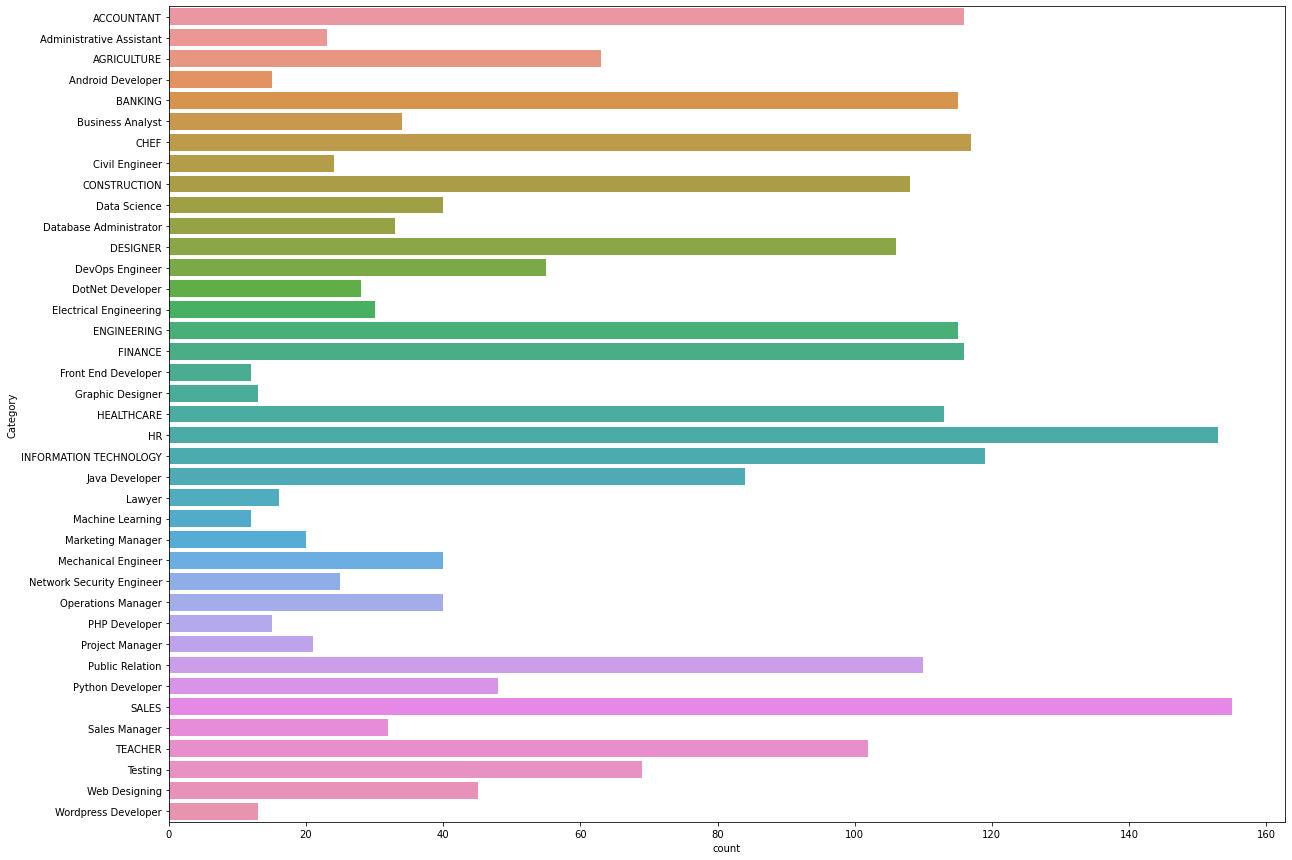

In [5]:
plt.figure(figsize=(20,15))
sns.countplot(y="Category",data=data)

In [6]:
data['clean text']=data.Resume.apply(lambda x: clean_r(x))

In [7]:
var_r=['Category']
le=LabelEncoder()
for i in var_r:
    data[i]=le.fit_transform(data[i])

In [8]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'ACCOUNTANT': 0, 'AGRICULTURE': 1, 'Administrative Assistant': 2, 'Android Developer': 3, 'BANKING': 4, 'Business Analyst': 5, 'CHEF': 6, 'CONSTRUCTION': 7, 'Civil Engineer': 8, 'DESIGNER': 9, 'Data Science': 10, 'Database Administrator': 11, 'DevOps Engineer': 12, 'DotNet Developer': 13, 'ENGINEERING': 14, 'Electrical Engineering': 15, 'FINANCE': 16, 'Front End Developer': 17, 'Graphic Designer': 18, 'HEALTHCARE': 19, 'HR': 20, 'INFORMATION TECHNOLOGY': 21, 'Java Developer': 22, 'Lawyer': 23, 'Machine Learning': 24, 'Marketing Manager': 25, 'Mechanical Engineer': 26, 'Network Security Engineer': 27, 'Operations Manager': 28, 'PHP Developer': 29, 'Project Manager': 30, 'Public Relation': 31, 'Python Developer': 32, 'SALES': 33, 'Sales Manager': 34, 'TEACHER': 35, 'Testing': 36, 'Web Designing': 37, 'Wordpress Developer': 38}


In [9]:
text=data['clean text'].values  
terget=data['Category'].values
vect_r=TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=2000)   
# Most frequent words
vect_r.fit(text)

Word_feature_r=vect_r.transform(text)
# Word_feature=vect_r.fit_transform(text)

print(Word_feature_r.shape)

(2395, 2000)


In [10]:
x_train=Word_feature_r
y_train=terget

In [11]:
model=OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
model.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=3))

# Training of Job descriptions

In [12]:
data_j=pd.read_csv('Job_Des_Final_Dataset.csv')
data_j.head(5)

,category,jobDescription
0,ACCOUNTANT,We are seeking an experienced Contract Auditor...
1,ACCOUNTANT,"RSP, Inc. is aggressively growing its business..."
2,ACCOUNTANT,Responsible for timely and accurate entry of i...
3,ACCOUNTANT,The accountant is a full-time national staff p...
4,ACCOUNTANT,The Armenian Forests NGO with funding from the...


In [13]:
print(data_j['category'].unique())
print ("total unique positions: {}". format(len(data_j['category'].unique())))

['ACCOUNTANT' 'Administrative Assistant' 'AGRICULTURE' 'Android Developer'
 'BANKING' 'Busines Analyst' 'CHEF' 'Civil Engineer' 'CONSTRUCTION'
 'Data Science' 'Database Administrator' 'DESIGNER' 'DevOps Engineer'
 'DotNet Developer' 'Electrical Engineer' 'ENGINEERING' 'FINANCE'
 'Front End Developer' 'Graphic Designer' 'HEALTHCARE' 'HR'
 'INFORMATION TECHNOLOGY' 'Java Developer' 'Lawyer' 'Machine Learning'
 'Marketing Manager' 'Mechanical Engineer' 'Network Security Engineer'
 'Operations Manager' 'PHP Developer' 'Project Manager' 'Public Relation '
 'Python Developer' 'SALES' 'Sales Manager' 'TEACHER' 'Testing'
 'Web Designing' 'Wordpress Developer']
total unique positions: 39


In [14]:
print(data_j['category'].value_counts())

FINANCE                      306
PHP Developer                245
Web Designing                228
Java Developer               213
Machine Learning             201
Lawyer                       180
Front End Developer          175
Data Science                 168
Administrative Assistant     150
ACCOUNTANT                   149
DevOps Engineer              141
Sales Manager                137
HR                           137
Wordpress Developer          132
Project Manager              126
INFORMATION TECHNOLOGY       125
Database Administrator       119
DotNet Developer              85
Graphic Designer              74
SALES                         70
Python Developer              68
DESIGNER                      56
ENGINEERING                   51
Marketing Manager             50
Testing                       44
CONSTRUCTION                  43
Public Relation               40
Android Developer             37
Busines Analyst               31
Civil Engineer                30
CHEF      

In [15]:
# plt.figure(figsize=(20,15))
# sns.countplot(y="category",data_j=data_j)

In [16]:
data_j['clean text']=data_j.jobDescription.apply(lambda x: clean_j(x))

In [17]:
var=['category']
le_j=LabelEncoder()
for i in var:
    data_j[i]=le_j.fit_transform(data_j[i])

In [18]:
le_j_name_mapping = dict(zip(le_j.classes_, le_j.transform(le_j.classes_)))
print(le_j_name_mapping)

{'ACCOUNTANT': 0, 'AGRICULTURE': 1, 'Administrative Assistant': 2, 'Android Developer': 3, 'BANKING': 4, 'Busines Analyst': 5, 'CHEF': 6, 'CONSTRUCTION': 7, 'Civil Engineer': 8, 'DESIGNER': 9, 'Data Science': 10, 'Database Administrator': 11, 'DevOps Engineer': 12, 'DotNet Developer': 13, 'ENGINEERING': 14, 'Electrical Engineer': 15, 'FINANCE': 16, 'Front End Developer': 17, 'Graphic Designer': 18, 'HEALTHCARE': 19, 'HR': 20, 'INFORMATION TECHNOLOGY': 21, 'Java Developer': 22, 'Lawyer': 23, 'Machine Learning': 24, 'Marketing Manager': 25, 'Mechanical Engineer': 26, 'Network Security Engineer': 27, 'Operations Manager': 28, 'PHP Developer': 29, 'Project Manager': 30, 'Public Relation ': 31, 'Python Developer': 32, 'SALES': 33, 'Sales Manager': 34, 'TEACHER': 35, 'Testing': 36, 'Web Designing': 37, 'Wordpress Developer': 38}


In [19]:
text_j=data_j['clean text'].values
terget_j=data_j['category'].values
test_text_j= data_j['clean text'].values
vect_j=TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=2000)

vect_j.fit(text_j)

Word_feature_j=vect_j.transform(text_j)

In [20]:
x_train_j=Word_feature_j
y_train_j=terget_j
# print(Word_feature_j)

In [21]:
model_j=OneVsRestClassifier(KNeighborsClassifier())
model_j.fit(x_train_j, y_train_j)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [ ]:
import flask
from flask import Flask,render_template,request,session,redirect,url_for
import json
import os
from tabula import read_pdf
# import pandas as pd
import tabula
import csv
import textract
# from werkzeug import secure_filename
from werkzeug.utils import secure_filename
from werkzeug.datastructures import  FileStorage
# import the functions of files...
import glob
# pip install ipynb
from ipynb.fs.full.pdf_to_csv import *
from ipynb.fs.full.functions_r_j import *
# from pdf_csv import *

# run a json file:
with open('config.json', 'r') as c:
    params = json.load(c)['params']

app = Flask(__name__)
app.secret_key = 'super-secret-key'
# upload Function:
# app.config['UPLOAD_FOLDER']= params['scan_now']
# for Resumes

app.config['UPLOAD_FOLDER']= params['upload_location']
# for job_des
app.config['UPLOAD_FILES']= params['upload_job']

@app.route("/")
def home():
    return render_template('index.html')
# when click on Scan now.................

@app.route("/about")
def about():
    return render_template('about.html')

# confidence_matrix = [[0 for x in range(3)] for y in range(len(20))]
# confidence_matrix = [[0 for x in range(3)] for y in range(20)]

@app.route('/upload', methods=['GET','POST'])
def upload():
    if flask.request.method == "POST":
        maxInt = sys.maxsize
        while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.
            try:
                csv.field_size_limit(maxInt)
                break
            except OverflowError:
                maxInt = int(maxInt/10)
        with open('static/Resumes/Resumes_Test.csv', 'a',encoding="utf-8") as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(['Resume'])
            f_object.close()
        files = flask.request.files.getlist("file")
        for file in files:
            text=  file.save(os.path.join(app.config['UPLOAD_FOLDER'], file.filename))
            pdf_r()
            dataset_r()
        test_data=pd.read_csv('static\Resumes\Resumes_Test_Final.csv',encoding='ISO-8859–1')
        
        test_data['clean text']=test_data.Resume.apply(lambda x: clean_r(x))  
        
        test_data= test_data['clean text'].values
        
        Word_feature_test=vect_r.transform(test_data)

#         print(Word_feature_test.shape)
        x_test=Word_feature_test   
        prediction_r=model.predict(x_test)
        prediction_r
        print(prediction_r)
#         for i in range(0 , len(test_data)):
#             print([[max(j)]for j in model.predict_proba(x_test[i])])
        
        for i in range(0 , len(test_data)):
            confidence_matrix[i][0]= prediction_r[i] # actual prediction
            confidence_matrix[i][1]= [max(j)for j in model.predict_proba(x_test[i])][0] #confidence
            confidence_matrix[i][2] = i # cv index of test instance
        print(confidence_matrix)
#         print(len(confidence_matrix))
    
#         vect=TfidfVectorizer(
#             sublinear_tf=True,
#             stop_words='english',
#             max_features=2000)
#         vect.fit(text)
#         Word_feature=vect.transform(text)
#         print(resume_test)
    return "Uploaded!";

confidence_matrix = [[0 for x in range(3)] for y in range(50)]
# global prediction_j = 0
@app.route("/uploader", methods= ['GET','POST'] )
def uploader():  
    if(request.method == 'POST'):
        maxInt = sys.maxsize
        while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.
            try:
                csv.field_size_limit(maxInt)
                break
            except OverflowError:
                maxInt = int(maxInt/10)
        with open('static/job_des/job_Test.csv', 'a',encoding="utf-8") as f_object:
            writer_object = writer(f_object)
            writer_object.writerow(['JobDescription'])
            f_object.close()
        f = request.files['file1']
        f.save(os.path.join(app.config['UPLOAD_FILES'],secure_filename(f.filename)))
        pdf_j()
        dataset_j()
        test_data_j=pd.read_csv('static\job_des\job_Test_Final.csv',encoding='ISO-8859–1')
        test_data_j['clean text']=test_data_j.JobDescription.apply(lambda x: clean_j(x))
        test_data_j = test_data_j['clean text'].values
#         print(test_data_j)
#         terget_j=test_data_j[test_data_j].values
        Word_feature_jtest=vect_j.transform(test_data_j)
#         print(Word_feature_jtest)
        j_test=Word_feature_jtest
        global prediction_j
        prediction_j=model_j.predict(j_test)
#         prediction_j
        print(prediction_j)
        
    return "Uploaded Successfully";


@app.route("/scan", methods=['GET','POST'])
def scan():
    output =request.form.to_dict()
    submit = output['submit']
    
#     scan = "Choosing the right people for the job is the biggest responsibility of every business since choosing the right set of people can accelerate"
#     scan="These are files"+listDir(FOLDER_PATH)
#     print(scan)

    
#     scan1 = "the Job Description is here"
    new_Confidence_matrix =[]
    print(prediction_j)
#     print(confidence_matrix)
    for i in range(0 , len(confidence_matrix)):
        if(confidence_matrix[i][0]== prediction_j):
            new_Confidence_matrix.append(confidence_matrix[i])
    new_Confidence_matrix=sorted(new_Confidence_matrix,reverse=True,key=lambda x: x[1])
    print(new_Confidence_matrix)
    path= r'static\Resumes'
    scan=glob.glob(path +"/*.pdf")
    print(scan)
    path_j = r'static\job_des'
    scan1 = glob.glob(path_j + "/*.pdf")
    print(scan1)
    new_Array=[]
    for i in range(0,len(new_Confidence_matrix)):
        if(len(new_Array)>9):
            break
        print(new_Confidence_matrix[i][2])
        print(scan[new_Confidence_matrix[i][2]])
        new_Array.append(scan[new_Confidence_matrix[i][2]])
        

    return render_template('/scan.html',submit= submit ,scan= new_Array, scan1= scan1)
    
@app.route("/contact")
def contact():
    return render_template('/contact.html')
@app.route("/work")
def work():
    return render_template('/work.html')
if __name__ == "__main__":
    app.run(host=os.getenv('IP', '0.0.0.0'), 
    port=int(os.getenv('PORT', 4455)))
   


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.8.145:4455/ (Press CTRL+C to quit)
192.168.8.145 - - [13/Jun/2022 08:32:44] "GET / HTTP/1.1" 200 -
Deprecation: 'getText' removed from class 'Page' after v1.19 - use 'get_text'.


In [ ]:
# resume_csv_r=pd.read_csv('static\Resumes\Resumes_Test_Final.csv',encoding='ISO-8859–1')
# resume_test=clean_r(resume_csv_r)
# print(resume_test)